# Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.


The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

# Solution

Importing the required libraries...

In [36]:
import sqlite3 
import pandas as pd 
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Read Data from the Database into pandas

In [37]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


# Basic Information on the dataset

In [38]:
# to see the columns and other information on the given data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

we can see that there are some null values present in the given dataset.So, the next step would be to address them.

In [39]:
#Details of categorical variable preferred_foot
df.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [40]:
#Details of categorical variable attacking work rate
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [41]:
#Details of categorical variable defencsive work rate
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [42]:
df.shape

(183978, 42)

Null Rows analysis in data

In [43]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df.isnull().sum(),'No.of rows': df.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in Basket ball data is : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in Basket ball data is : 



,column_name,No. Of Missing rows,No.of rows,percent_missing
id,id,0,183978,0.000000
player_fifa_api_id,player_fifa_api_id,0,183978,0.000000
player_api_id,player_api_id,0,183978,0.000000
date,date,0,183978,0.000000
shot_power,shot_power,836,183142,0.454402
stamina,stamina,836,183142,0.454402
strength,strength,836,183142,0.454402
long_shots,long_shots,836,183142,0.454402
aggression,aggression,836,183142,0.454402
interceptions,interceptions,836,183142,0.454402


In [44]:
# Replacing Null/NA values with Their mean for features having interger or float datatype
for col in df.select_dtypes(['int64','float64']):
    df[col]=df[col].fillna((df[col].mean()))

In [45]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df.isnull().sum(),'No.of rows': df.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in Basket ball data is : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in Basket ball data is : 



,column_name,No. Of Missing rows,No.of rows,percent_missing
id,id,0,183978,0.000000
balance,balance,0,183978,0.000000
shot_power,shot_power,0,183978,0.000000
jumping,jumping,0,183978,0.000000
stamina,stamina,0,183978,0.000000
strength,strength,0,183978,0.000000
long_shots,long_shots,0,183978,0.000000
aggression,aggression,0,183978,0.000000
interceptions,interceptions,0,183978,0.000000
positioning,positioning,0,183978,0.000000


As stated , there is no null rows or missing data available iin Basketball data after missing row treatment except for Features those have object datatype.

# Data Visualization

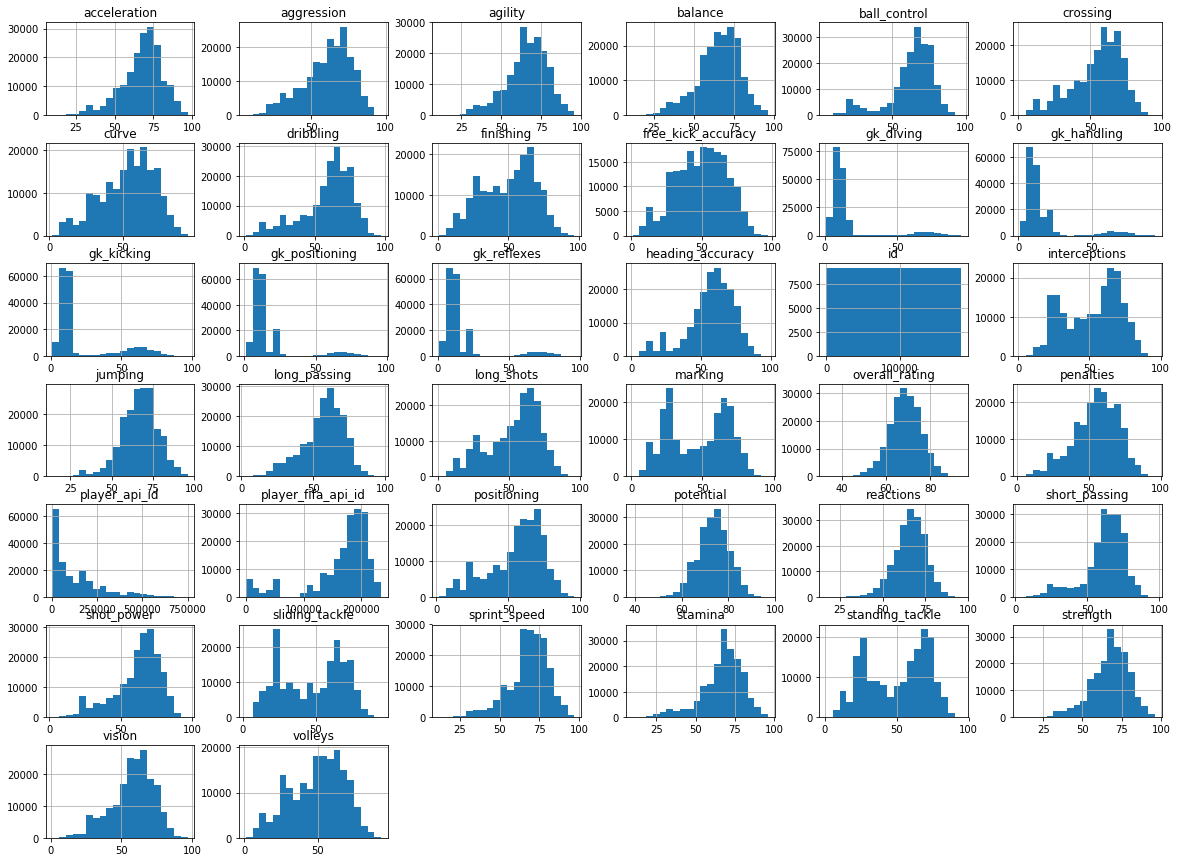

In [46]:
df.hist(bins=20, figsize=(20,15))
plt.show()

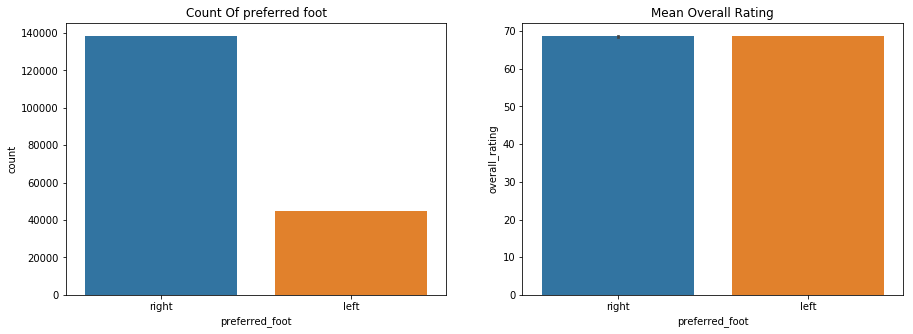

In [47]:
#Analyze the significane of left and Right Foot.
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.preferred_foot)
plt.title('Count Of preferred foot')

plt.subplot(1,2,2)
sns.barplot(x='preferred_foot', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean Overall Rating')
plt.show()

## Imputing target funtion :

In [48]:
# Taking target variable out from the given dataset
target = df.pop("overall_rating")
target.describe()

count    183978.000000
mean         68.600015
std           7.025124
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

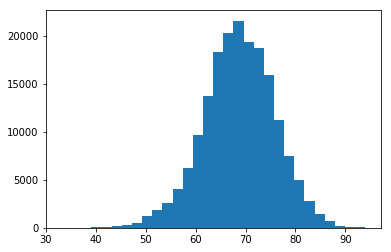

In [49]:
plt.hist(target, 30, range=(33, 94))
plt.show()

almost normal distribution so we can impute mean value for missing value in target.

In [50]:
y = target.fillna(target.mean())
y.isnull().values.any()

False

# Data Exploration :

In [51]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [52]:
for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}--> {unique_cat}..{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))

id--> 183978..int64
player_fifa_api_id--> 11062..int64
player_api_id--> 11060..int64
date--> 197..object
potential--> 57..float64
preferred_foot--> 3..object
attacking_work_rate--> 9..object
defensive_work_rate--> 20..object
crossing--> 96..float64
finishing--> 98..float64
heading_accuracy--> 97..float64
short_passing--> 96..float64
volleys--> 94..float64
dribbling--> 98..float64
curve--> 93..float64
free_kick_accuracy--> 98..float64
long_passing--> 96..float64
ball_control--> 94..float64
acceleration--> 87..float64
sprint_speed--> 86..float64
agility--> 82..float64
reactions--> 79..float64
balance--> 82..float64
shot_power--> 97..float64
jumping--> 80..float64
stamina--> 85..float64
strength--> 83..float64
long_shots--> 97..float64
aggression--> 92..float64
interceptions--> 97..float64
positioning--> 96..float64
vision--> 98..float64
penalties--> 95..float64
marking--> 96..float64
standing_tackle--> 96..float64
sliding_tackle--> 95..float64
gk_diving--> 94..float64
gk_handling--> 91..

we can see only four features have the type 'object'. here the feature named 'date' has no significance in this problem so can ignore it and perform one hot encoding on the rest of 3 features.

In [53]:
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
X = dummy_df.drop(['id', 'date'], axis=1)

# Split Train and Test Dateset

In [55]:
# We are selecting 75:25 ration for train and test dataset
# shuffle paramter for shuffling the datasets before splitting
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=25 , shuffle=True)

In [57]:
# Details of Tarin and test dataset is :
print("The No. of rows in Features Training Dataset(X_train) is : {0}\n , No. of Columns in Features Training Dataset(X_train) is {1}:\
    ".format(X_train.shape[0],X_train.shape[1]),"\n")
print("The No. of rows in Target Training Dataset(y_train) is : {0}".format(y_train.shape[0]),"\n")

print("The No. of rows in Features Test Dataset(X_Test) is : {0}\n , No. of Columns in Features Training Dataset(X_Test) is {1}:\
    ".format(X_test.shape[0],X_test.shape[1]) , "\n")
print("The No. of rows in Target Test Dataset(y_test) is : {0}".format(y_test.shape[0]),"\n")

The No. of rows in Features Training Dataset(X_train) is : 137983
 , No. of Columns in Features Training Dataset(X_train) is 65:     

The No. of rows in Target Training Dataset(y_train) is : 137983 

The No. of rows in Features Test Dataset(X_Test) is : 45995
 , No. of Columns in Features Training Dataset(X_Test) is 65:     

The No. of rows in Target Test Dataset(y_test) is : 45995 



# Training different models

# 1. Linear Regression

In [61]:
# Apply linear regression model between Tagret and and independent features using Training dataset
reg_model = LinearRegression()

# fitting of Target and Features
reg_model.fit(X_train, y=y_train)

# Calculation for R^2 (R sqaure)
reg_model_R_square =reg_model.score(X=X_train, y=y_train) 

# Calculation for Predicted overall rating based upon features training dataset
y_pred_train = reg_model.predict(X=X_train)

print("The Coefficient of determination R^2 (R square) on Training Dataset : ",reg_model_R_square,"\n")
print("The Intercept Value for linear regression model is : " ,reg_model.intercept_ ,"\n")
print("The Predicted Overall rating based upon Features training dataset is (first 5 values):\n " ,y_pred_train[0:5] )

The Coefficient of determination R^2 (R square) on Training Dataset :  0.8605299584793303 

The Intercept Value for linear regression model is :  -0.46386415275662785 

The Predicted Overall rating based upon Features training dataset is (first 5 values):
  [63.46803949 61.07223768 61.13335333 69.19083815 70.22149641]


In [62]:
# Mapping Coeffient values with their features name
df_reg_model_Coef = pd.DataFrame(list(zip(X_train.columns , reg_model.coef_)) ,columns=['Features', 'Etimated coefficients'])
print("The Features with their coeffient values(first 5 rows)  are:")
df_reg_model_Coef.head(5)

The Features with their coeffient values(first 5 rows)  are:


,Features,Etimated coefficients
0,player_fifa_api_id,-0.000008
1,player_api_id,-0.000006
2,potential,0.445766
3,crossing,0.006179
4,finishing,0.014729


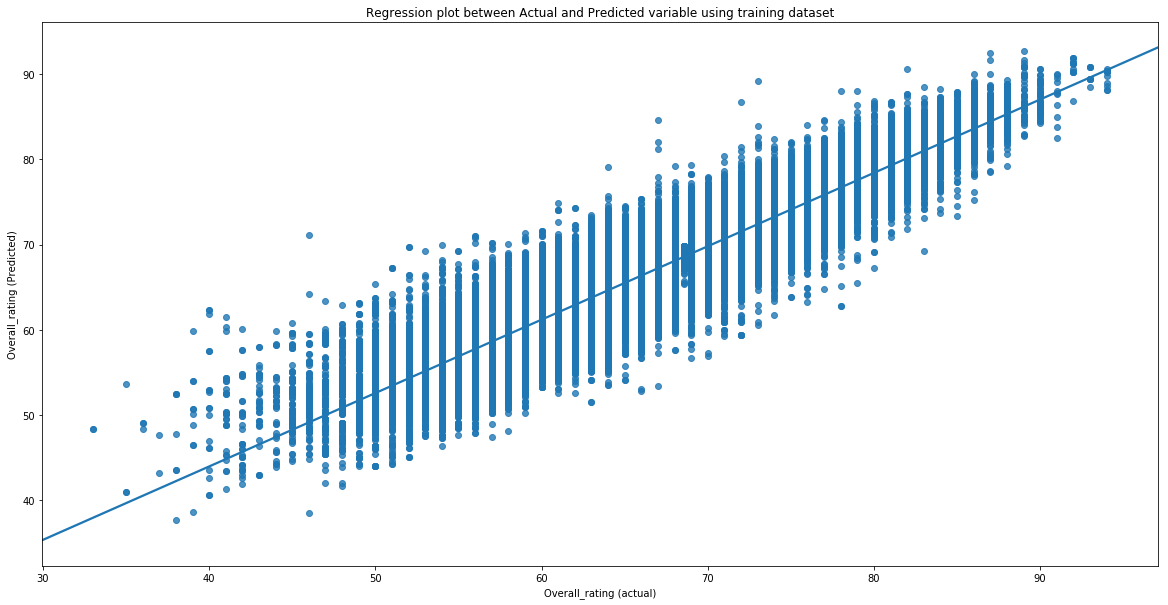

In [63]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Training dataset
fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train ,data=X_train) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using training dataset")
plt.show()

In [64]:
# Model Score predictions using Test Dataset
reg_model_R_square_Test= reg_model.score(X_test,y_test)
print("The Coefficient of determination R^2 (R square) on Test Dataset : ",reg_model_R_square_Test,"\n")

# Prediction of overall rating based upon Test data set
y_pred_test= reg_model.predict(X_test)

The Coefficient of determination R^2 (R square) on Test Dataset :  0.8588100435734953 



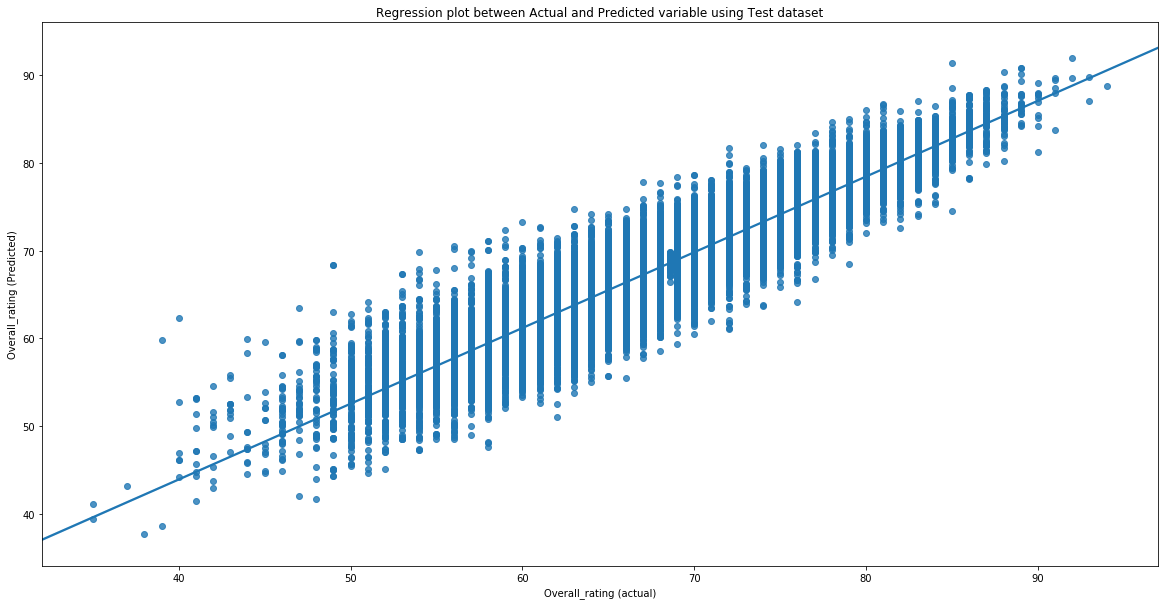

In [65]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Test dataset

fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_test, y=y_pred_test ,data=X_test) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using Test dataset")
plt.show()

As we can see that , The line of goodness fit (regression line) is increasing upwards , for both training and test dataset, as the data has been plot between player's actual overall rating and player's predicted rating return by regression model.

# Evaluate Model Performance

In [66]:
# Comaprison of Actual and Predicted Overall_rating on Test dataset
df_OverallRating_Test = pd.DataFrame({"Actual_rating":y_test,"Predicted_rating":reg_model.predict(X_test) })
df_OverallRating_Test.head(10)

,Actual_rating,Predicted_rating
171686,67.0,67.604273
145437,75.0,75.972117
74187,77.0,77.851191
139872,57.0,58.046885
98791,59.0,59.518246
129261,69.0,67.315557
14511,76.0,76.120651
18498,81.0,79.953429
76653,85.0,79.783916
33935,71.0,71.940507


In [67]:
# Regression model evaluation on Training dataset
mean_absolute_error = metrics.mean_absolute_error(y_train,y_pred_train)

mean_sqaured_error = metrics.mean_squared_error(y_train,y_pred_train)

root_mean_sqaured_error = math.sqrt(mean_sqaured_error)

print('Mean Absolute Error on Training dataset:', mean_absolute_error)  
print('Mean Squared Error on Training dataset:', mean_sqaured_error)  
print('Root Mean Squared Error on Training dataset:', root_mean_sqaured_error)

Mean Absolute Error on Training dataset: 1.9899757886544318
Mean Squared Error on Training dataset: 6.935315459178042
Root Mean Squared Error on Training dataset: 2.6334987106847123


In [68]:
# Regression model evaluation on Training dataset

mean_absolute_error_test = metrics.mean_absolute_error(y_test,y_pred_test)

mean_sqaured_error_test= metrics.mean_squared_error(y_test,y_pred_test)

root_mean_sqaured_error_test = math.sqrt(mean_sqaured_error_test)

print('Mean Absolute Error on Test dataset:', mean_absolute_error_test)  
print('Mean Squared Error on Test dataset:', mean_sqaured_error_test)  
print('Root Mean Squared Error on Test dataset:', root_mean_sqaured_error_test)

Mean Absolute Error on Test dataset: 1.9777630601817555
Mean Squared Error on Test dataset: 6.809442182822786
Root Mean Squared Error on Test dataset: 2.609490789947875


It can be observed that RMSE (Root Mean Squared Error) for Target variable in test set (predicted overall rating) is 2.6 which is less than that of training set. 
Hence, we can belive that our model performance is far good.

Residual Plot :Residual plots are way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero.

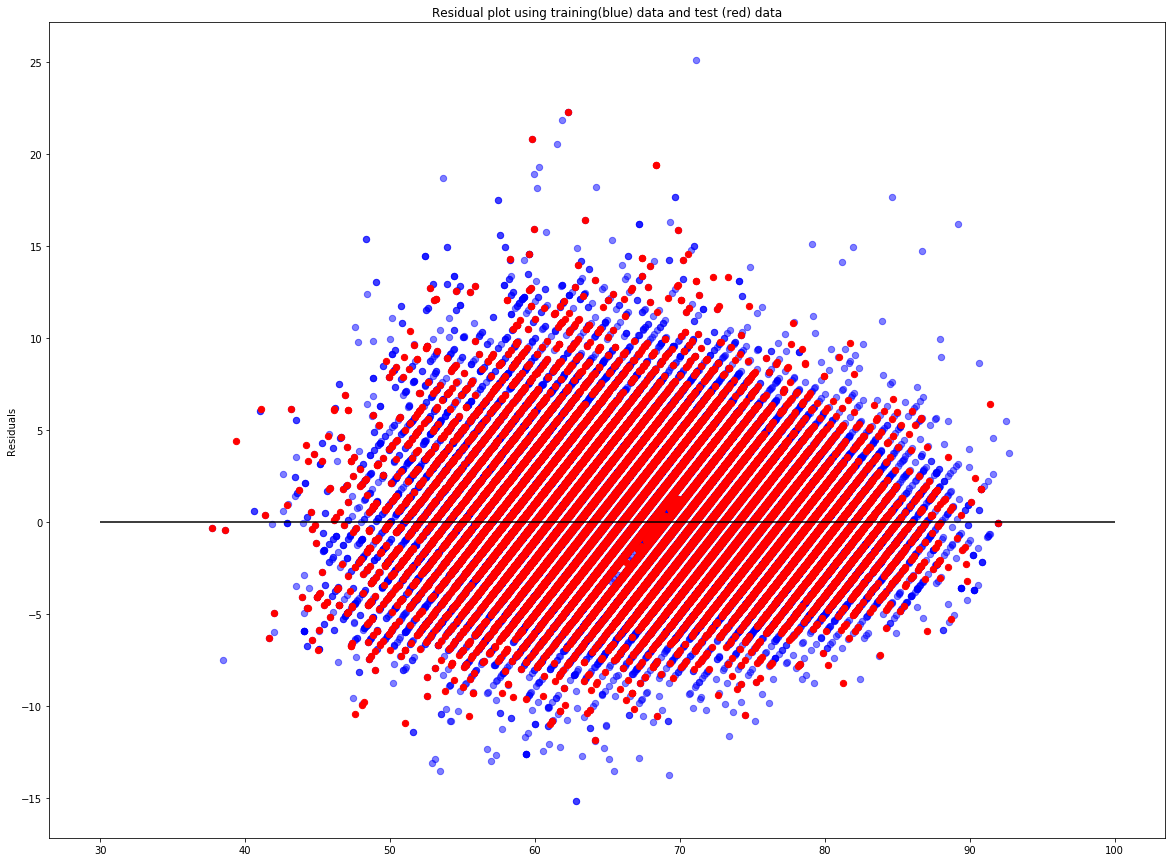

In [69]:
fig= plt.figure(figsize=(20,15))
plt.scatter(reg_model.predict(X_train),reg_model.predict(X_train)-y_train , c='b',s=40, alpha=0.5 , )
plt.scatter(reg_model.predict(X_test),reg_model.predict(X_test)-y_test , c='r',s=40)
plt.hlines(y=0, xmin=30, xmax=100)
plt.title('Residual plot using training(blue) data and test (red) data')
plt.ylabel('Residuals')
plt.show()

As we can see that, Data for both training and test data randomly distributed around horizonal line , which is line zero.

# Cross Validation Scores

In [70]:
# Perform 10-fold cross validation using 
scores = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores , "\n")
print("Mean Cross-validated score:", scores.mean(),"\n")
print("Standard deviation of scores:", scores.std())

Cross-validated scores: [-6.89408546 -6.84609517 -6.86942    -7.21091123 -6.85603457 -7.34920306
 -6.79678538 -6.84460979 -6.95591541 -6.81182933] 

Mean Cross-validated score: -6.943488940506922 

Standard deviation of scores: 0.17605880940257193


# Fitting Data Using StasModel

In [71]:
import statsmodels.api as Stats
# Fitting of data using OLS (ordinary least sqaure method)
reg_model_OLS = Stats.OLS(endog=y_train , exog=X_train , hasconst=True).fit()
# Prediction of Overall rating return by Regression model
y_pred_OLS=reg_model_OLS.predict(X_train)

In [72]:
print(reg_model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.467e+04
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:35:41   Log-Likelihood:            -3.2940e+05
No. Observations:              137983   AIC:                         6.589e+05
Df Residuals:                  137924   BIC:                         6.595e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
player_fifa_api_id  

In [73]:
print("The Coefficient of determination R^2 (R square) on Training Dataset(OLS model) : ",reg_model_OLS.rsquared,"\n")

print("The Predicted Overall rating based upon Features training dataset is (first 5 values) (OLS model):\n " )
y_pred_OLS[0:5]

The Coefficient of determination R^2 (R square) on Training Dataset(OLS model) :  0.8605203776501418 

The Predicted Overall rating based upon Features training dataset is (first 5 values) (OLS model):
 


133965    63.475366
17293     61.085508
105272    61.149205
50368     69.186129
22911     70.214966
dtype: float64

# As, We can see that when model is fitted with OLS method from Statsmodel, again it's Coefficient of determination is returning as 86%

# 2. Decision Tree

In [74]:
# Calling of DecisionTreeReegressor model
decision_tree_model = DecisionTreeRegressor()
#Fitting of Data into model (training data)
decision_tree_model.fit(X=X_train , y=y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
# Prediction of overall rating 
y_pred_dec_tree = decision_tree_model.predict(X_train)
print("Predicted overall ratings : (first 5 rows)")
y_pred_dec_tree[0:5]

Predicted overall ratings : (first 5 rows)


array([64.33333333, 58.        , 65.        , 71.        , 68.        ])

In [76]:
# Accuracy of Decision tree model 
dec_tree_Accuracy_score =decision_tree_model.score(X=X_train , y=y_train)
print("Accuracy of Decision Tree model to Predict Rating of players")
dec_tree_Accuracy_score*100

Accuracy of Decision Tree model to Predict Rating of players


99.94208782299371

# Conclusion:

As we observe, Decision tree model has predicted with accuracy (99%) and the Linear regression model has predicted accuracy with 84%.
Looks like, Decision tree performs well for the given task. i.e Predicting players rating.